# 概要
    <1> 導入套件
    <2> 讀取並初步處理資料
    <3> 風險指標

## <1> 導入套件

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## <2> 讀取並初步處理資料

In [2]:
data = pd.read_csv('test.csv', index_col = 0, parse_dates = True)
data.head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,2913.51,13.488,5.453,15.380
2016-06-02,2925.23,13.547,5.739,15.408
2016-06-03,2938.68,13.714,5.647,15.426
2016-06-06,2934.10,13.744,5.659,15.278
2016-06-07,2936.04,13.567,5.666,15.306


## <3> 計算報酬率

#### (1) 報酬率(HPR) 
    - 買進時點 = 2016-06-01
    - 賣出時間 = 每日計算一次如果在今天賣出的HPR

In [3]:
data2 = ( data / data.iloc[0] ) -1
data2.head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000
2016-06-02,0.004023,0.004374,0.052448,0.001821
2016-06-03,0.008639,0.016756,0.035577,0.002991
2016-06-06,0.007067,0.018980,0.037777,-0.006632
2016-06-07,0.007733,0.005857,0.039061,-0.004811


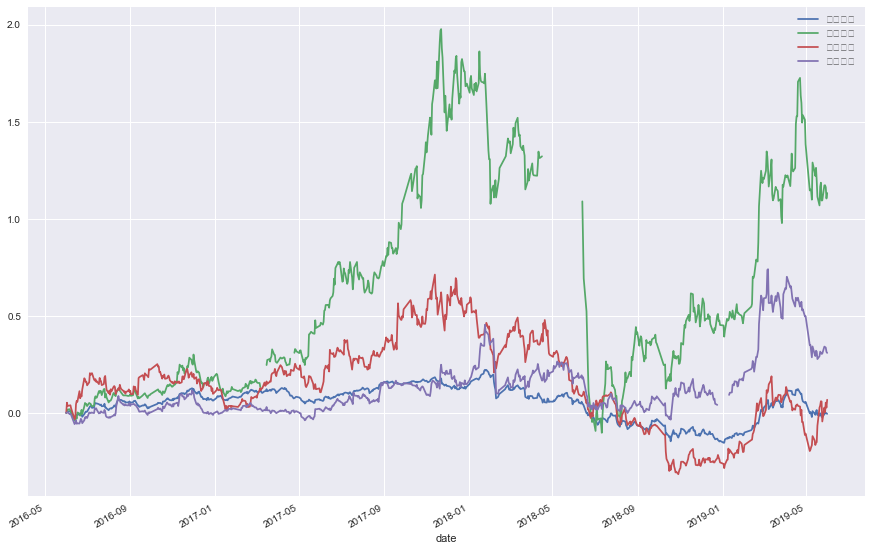

In [4]:
data2.plot(figsize = (15,10))

In [5]:
returns = pd.DataFrame( {'報酬率' : data2.iloc[-1]} )
returns

,報酬率
上证综指,-0.005083
中兴通讯,1.132266
华天科技,0.067302
中信证券,0.308843


#### (2) 年化報酬率(annualized HPR)

In [6]:
# t = 樣本數(天數)
# 一年交易日 = 250
t = len(data)
t

730

In [7]:
import math

In [8]:
returns_year = pow( (1 + returns), 250 / t ) - 1  # pow(數值,次方)
returns_year

,報酬率
上证综指,-0.001744
中兴通讯,0.296035
华天科技,0.022557
中信证券,0.096554


## <3> 風險指標

#### (1) 最大回撤(Max Drawdown) 
- 公式 : max( Pi - Pj) / Pi
         其中 i = 某一天股價
              j = i之後的某天股價 ( j > i )
              max(Pi-Pj) = 最大股價Pi-現在股價Pj
              max(Pi-Pj)/Pi = 股價最大跌幅
- 意義 : 衡量策略抗壓能力或最大風險，易言之，就是計算該策略最慘(股票跌幅)的情況
- 工具 : cummax() 

練習 cummax() : 累計資料並取最大值

In [9]:
a = pd.Series([1,2,4,np.nan,1,9,6])
a

0    1.0
1    2.0
2    4.0
3    NaN
4    1.0
5    9.0
6    6.0
dtype: float64

In [10]:
# 累計到第1筆資料最大值 = 1
# 累計到第2筆資料最大值 = 2
# 累計到第3筆資料最大值 = 4
# 累計到第4筆資料出現缺失值
# 累計到第5筆資料最大值 = 4
# 累計到第6筆資料最大值 = 9
# 累計到第7筆資料最大值 = 9
a.cummax()

0    1.0
1    2.0
2    4.0
3    NaN
4    4.0
5    9.0
6    9.0
dtype: float64

In [11]:
data.head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,2913.51,13.488,5.453,15.380
2016-06-02,2925.23,13.547,5.739,15.408
2016-06-03,2938.68,13.714,5.647,15.426
2016-06-06,2934.10,13.744,5.659,15.278
2016-06-07,2936.04,13.567,5.666,15.306


In [12]:
data.cummax().head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,2913.51,13.488,5.453,15.380
2016-06-02,2925.23,13.547,5.739,15.408
2016-06-03,2938.68,13.714,5.739,15.426
2016-06-06,2938.68,13.744,5.739,15.426
2016-06-07,2938.68,13.744,5.739,15.426


開始計算最大回撤

In [13]:
# 累計至今天最大股價 - 今日股價
( data.cummax() - data ).head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,0.00,0.000,0.000,0.000
2016-06-02,0.00,0.000,0.000,0.000
2016-06-03,0.00,0.000,0.092,0.000
2016-06-06,4.58,0.000,0.080,0.148
2016-06-07,2.64,0.177,0.073,0.120


In [14]:
Max_Drawdown = pd.DataFrame( {'最大回撤':( ( data.cummax() - data ) / data.cummax() ).max()} )
Max_Drawdown

,最大回撤
上证综指,0.307661
中兴通讯,0.698630
华天科技,0.600514
中信证券,0.336196


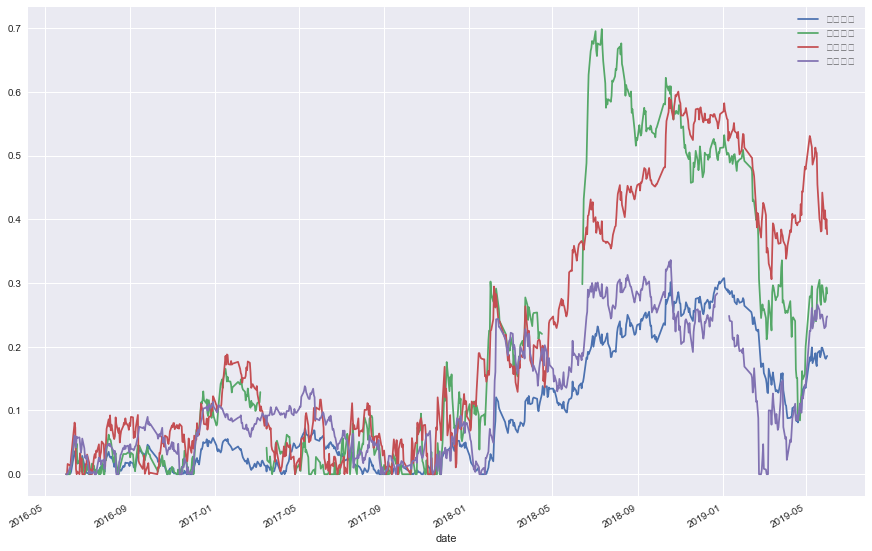

In [15]:
( ( data.cummax() - data ) / data.cummax() ).plot(figsize = (15,10))

#### (2) Sharpe ratio

In [16]:
# 無風險利率
rf = 0.04  

In [17]:
# 平均報酬率
rp = data2.mean()
rp

上证综指    0.051548
中兴通讯    0.629364
华天科技    0.153773
中信证券    0.126525
dtype: float64

In [18]:
# 標準差(風險)
sigma = data2.std()
sigma

上证综指    0.085425
中兴通讯    0.542529
华天科技    0.221867
中信证券    0.153218
dtype: float64

In [19]:
Sharpe_ratio = ( rp - rf ) / sigma
Sharpe_ratio

上证综指    0.135177
中兴通讯    1.086327
华天科技    0.512797
中信证券    0.564717
dtype: float64

In [20]:
data_Sharpe = pd.DataFrame( {'平均報酬率':rp,
                            '標準差(風險)':sigma,
                             'Sharpe ratio':Sharpe_ratio,
                            }
                          )
data_Sharpe

,平均報酬率,標準差(風險),Sharpe ratio
上证综指,0.051548,0.085425,0.135177
中兴通讯,0.629364,0.542529,1.086327
华天科技,0.153773,0.221867,0.512797
中信证券,0.126525,0.153218,0.564717
